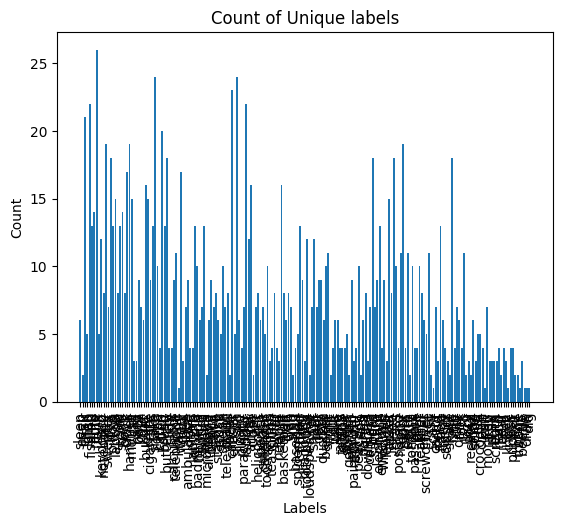

In [36]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import time
import pandas as pd

d = np.load("data.npy", allow_pickle=True)

labellist=[]
n=len(d)

for i in range(0,n):
    labellist.append(d[i][3])

name_counts = Counter(labellist)
unique_names = list(name_counts.keys())
name_counts = list(name_counts.values())


plt.bar(unique_names, name_counts)
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Count of Unique labels")
plt.xticks(rotation=90)
plt.show()


In [37]:
class CustomClassifier:
    def __init__(self, encoder='default', k=3, distmetric='manhatten',multi=1):
        self.encoder = encoder
        self.k = k
        self.distmetric = distmetric
        self.multi=multi

    def calculate_distance(self, arr1, arr2):
        if self.distmetric == 'manhatten':
            return np.sum(np.abs(arr1 - arr2))
        elif self.distmetric == 'euclidean':
            temparr = arr1 - arr2
            temparr1 = temparr * temparr
            return np.sqrt(np.sum(temparr1))
        elif self.distmetric == 'cosine':
            dotarr = np.dot(arr1, arr2)
            modarr1 = np.linalg.norm(arr1)
            modarr2 = np.linalg.norm(arr2)
            return 1 - (dotarr / (modarr1 * modarr2))

    def fit_predict_evaluate(self):
        data = np.load("data.npy", allow_pickle=True)
        n = len(data)
        n=int(n*self.multi)
        li = int(0.8*n)
        r = li + 1

        given = []
        pred = []

        for i in range(r, n - 1):
            arr1 = np.array(data[i][self.encoder][0])
            l = []

            for j in range(0, li):
                arr2 = np.array(data[j][self.encoder][0])
                dist = self.calculate_distance(arr1, arr2)
                newpair = (dist, data[j][3])
                l.append(newpair)

            sorted_l = sorted(l, key=lambda x: x[0])

            predlist = [sorted_l[w][1] for w in range(0, self.k)]

            occurrences = {}
            for item in predlist:
                if item in occurrences:
                    occurrences[item] += 1
                else:
                    occurrences[item] = 1

            key_with_max_occurrences = max(occurrences, key=occurrences.get)
            pred.append(key_with_max_occurrences)
            given.append(data[i][3])

        f1 = f1_score(given, pred, average='weighted', zero_division=1)
        accuracy = accuracy_score(given, pred)
        precision = precision_score(given, pred, average='weighted', zero_division=1)
        recall = recall_score(given, pred, average='weighted', zero_division=1)

        return {
            'accuracy': accuracy,
            'f1': f1,
            'precision': precision,
            'recall': recall,
            'params': (self.encoder, self.k, self.distmetric)
        }


arr=[]

for i in range(1,30):
    for j in range(1,3):
        classifier = CustomClassifier(encoder=j, k=i, distmetric='euclidean')
        result = classifier.fit_predict_evaluate()
        print(result)
        arr.append((result['accuracy'],result['params']))


for i in range(1,30):
    for j in range(1,3):
        classifier = CustomClassifier(encoder=j, k=i, distmetric='manhatten')
        result = classifier.fit_predict_evaluate()
        print(result)
        arr.append((result['accuracy'],result['params']))


for i in range(1,30):
    for j in range(1,3):
        classifier = CustomClassifier(encoder=j, k=i, distmetric='cosine')
        result = classifier.fit_predict_evaluate()
        print(result)
        arr.append((result['accuracy'],result['params']))

{'accuracy': 0.20469798657718122, 'f1': 0.19393037874088012, 'precision': 0.4834003990044258, 'recall': 0.20469798657718122, 'params': (1, 1, 'euclidean')}
{'accuracy': 0.26174496644295303, 'f1': 0.2593228360006883, 'precision': 0.5030379296318893, 'recall': 0.26174496644295303, 'params': (2, 1, 'euclidean')}
{'accuracy': 0.20469798657718122, 'f1': 0.19393037874088012, 'precision': 0.4834003990044258, 'recall': 0.20469798657718122, 'params': (1, 2, 'euclidean')}
{'accuracy': 0.26174496644295303, 'f1': 0.2593228360006883, 'precision': 0.5030379296318893, 'recall': 0.26174496644295303, 'params': (2, 2, 'euclidean')}
{'accuracy': 0.21140939597315436, 'f1': 0.20119259825142177, 'precision': 0.49406868299485746, 'recall': 0.21140939597315436, 'params': (1, 3, 'euclidean')}
{'accuracy': 0.2785234899328859, 'f1': 0.268297833674857, 'precision': 0.5027488451146169, 'recall': 0.2785234899328859, 'params': (2, 3, 'euclidean')}
{'accuracy': 0.2080536912751678, 'f1': 0.1944943747746748, 'precision

In [38]:
sorted_arr=sorted(arr,reverse=True)

for i in range(0,20):
    encoder=sorted_arr[i][1][0]
    k=sorted_arr[i][1][1]
    distmet=sorted_arr[i][1][2]

    s=''
    if(encoder==1):
        s='Resnet'
    else:
        s='VIT'

    print(str(sorted_arr[i][0])+' '+s+' '+str(k)+' '+distmet)


0.3087248322147651 VIT 10 euclidean
0.3087248322147651 VIT 9 euclidean
0.3087248322147651 VIT 8 euclidean
0.3053691275167785 VIT 8 manhatten
0.30201342281879195 VIT 9 cosine
0.2986577181208054 VIT 9 manhatten
0.2986577181208054 VIT 7 manhatten
0.2986577181208054 VIT 6 manhatten
0.2953020134228188 VIT 11 manhatten
0.2953020134228188 VIT 10 cosine
0.29194630872483224 VIT 11 euclidean
0.29194630872483224 VIT 10 manhatten
0.29194630872483224 VIT 8 cosine
0.29194630872483224 VIT 5 manhatten
0.29194630872483224 VIT 4 manhatten
0.28859060402684567 VIT 18 manhatten
0.28859060402684567 VIT 17 manhatten
0.28859060402684567 VIT 14 manhatten
0.28859060402684567 VIT 11 cosine
0.28859060402684567 VIT 7 euclidean


In [39]:

class CustomClassifierV:
    def __init__(self, encoder='default', k=3, distmetric='manhatten',multi=1):
        self.encoder = encoder
        self.k = k
        self.distmetric = distmetric
        self.multi=multi

    #used chatgpt to change my code to support vectorisation: gave previous calculate distance code and asked it to convert ot to support vectorised arr1 &arr2
    def calculate_distances(self, arr1, arr2):
        if self.distmetric == 'manhatten':
            distances = np.sum(np.abs(arr1[:, np.newaxis, :] - arr2), axis=2)
        elif self.distmetric == 'euclidean':
            temparr = arr1[:, np.newaxis, :] - arr2
            distances = np.sqrt(np.sum(temparr * temparr, axis=2))
        elif self.distmetric == 'cosine':
            dotarr = np.matmul(arr1, arr2.T)
            modarr1 = np.linalg.norm(arr1, axis=1, keepdims=True)
            modarr2 = np.linalg.norm(arr2, axis=1, keepdims=True)
            distances = 1 - (dotarr / (modarr1 * modarr2.T))
        return distances

    def fit_predict_evaluate(self):
        data = np.load("data.npy", allow_pickle=True)
        n1 = len(data)
        # print(n1)
        n=int(n1*self.multi)
        # print(n)
        li = int(0.8*n)
        # print(li)
        r = li + 1

        #used chatgpt to produce the following for use in vectorisation : gave my code and asked it to remove for loops by implementing vectorization
        arr1 = np.array([data[i][self.encoder][0] for i in range(r, n - 1)])
        arr2 = np.array([data[j][self.encoder][0] for j in range(0, li)])

        distances = self.calculate_distances(arr1, arr2)

        sorted_indices = np.argsort(distances, axis=1)
        # print(n1)
        # print(n)
        # print(li)
        predlist = data[0:li, 3][sorted_indices[:, :self.k]]

        pred = []

        for row in predlist:
            element_counts = Counter(row)
            most_common_element, most_common_count = element_counts.most_common(1)[0]
            pred.append(most_common_element)

        given = data[r:n - 1, 3]

        f1 = f1_score(given, pred, average='weighted', zero_division=1)
        accuracy = accuracy_score(given, pred)
        precision = precision_score(given, pred, average='weighted', zero_division=1)
        recall = recall_score(given, pred, average='weighted', zero_division=1)

        return {
            'accuracy': accuracy,
            'f1': f1,
            'precision': precision,
            'recall': recall,
            'params': (self.encoder, self.k, self.distmetric)
        }


arr1=[]

for i in range(1,30):
    for j in range(1,3):
        classifier = CustomClassifierV(encoder=j, k=i, distmetric='euclidean')
        result = classifier.fit_predict_evaluate()
        print(result)
        arr1.append((result['accuracy'],result['params']))


for i in range(1,30):
    for j in range(1,3):
        classifier = CustomClassifierV(encoder=j, k=i, distmetric='manhatten')
        result = classifier.fit_predict_evaluate()
        print(result)
        arr1.append((result['accuracy'],result['params']))


for i in range(1,30):
    for j in range(1,3):
        classifier = CustomClassifierV(encoder=j, k=i, distmetric='cosine')
        result = classifier.fit_predict_evaluate()
        print(result)
        arr1.append((result['accuracy'],result['params']))




{'accuracy': 0.20469798657718122, 'f1': 0.19393037874088012, 'precision': 0.4834003990044258, 'recall': 0.20469798657718122, 'params': (1, 1, 'euclidean')}
{'accuracy': 0.26174496644295303, 'f1': 0.2593228360006883, 'precision': 0.5030379296318893, 'recall': 0.26174496644295303, 'params': (2, 1, 'euclidean')}
{'accuracy': 0.20469798657718122, 'f1': 0.19393037874088012, 'precision': 0.4834003990044258, 'recall': 0.20469798657718122, 'params': (1, 2, 'euclidean')}
{'accuracy': 0.26174496644295303, 'f1': 0.2593228360006883, 'precision': 0.5030379296318893, 'recall': 0.26174496644295303, 'params': (2, 2, 'euclidean')}
{'accuracy': 0.21140939597315436, 'f1': 0.20119259825142177, 'precision': 0.49406868299485746, 'recall': 0.21140939597315436, 'params': (1, 3, 'euclidean')}
{'accuracy': 0.2785234899328859, 'f1': 0.268297833674857, 'precision': 0.5027488451146169, 'recall': 0.2785234899328859, 'params': (2, 3, 'euclidean')}
{'accuracy': 0.2080536912751678, 'f1': 0.1944943747746748, 'precision

In [40]:
sorted_arr1=sorted(arr1,reverse=True)

for i in range(0,20):
    encoder=sorted_arr1[i][1][0]
    k=sorted_arr1[i][1][1]
    distmet=sorted_arr1[i][1][2]

    s=''
    if(encoder==1):
        s='Resnet'
    else:
        s='VIT'

    print(str(sorted_arr1[i][0])+' '+s+' '+str(k)+' '+distmet)

0.3087248322147651 VIT 10 euclidean
0.3087248322147651 VIT 9 euclidean
0.3087248322147651 VIT 8 euclidean
0.3053691275167785 VIT 8 manhatten
0.30201342281879195 VIT 9 cosine
0.2986577181208054 VIT 9 manhatten
0.2986577181208054 VIT 7 manhatten
0.2986577181208054 VIT 6 manhatten
0.2953020134228188 VIT 11 manhatten
0.2953020134228188 VIT 10 cosine
0.29194630872483224 VIT 11 euclidean
0.29194630872483224 VIT 10 manhatten
0.29194630872483224 VIT 8 cosine
0.29194630872483224 VIT 5 manhatten
0.29194630872483224 VIT 4 manhatten
0.28859060402684567 VIT 18 manhatten
0.28859060402684567 VIT 17 manhatten
0.28859060402684567 VIT 14 manhatten
0.28859060402684567 VIT 11 cosine
0.28859060402684567 VIT 7 euclidean


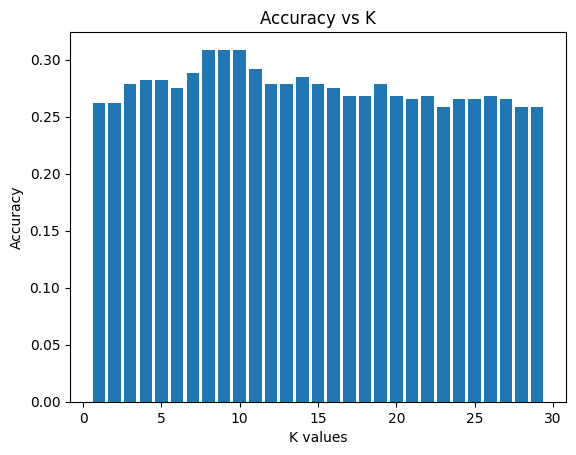

In [41]:
accarr=[]
iteration=[]

for i in range(1,30):
    classifier = CustomClassifierV(encoder=2, k=i, distmetric='euclidean')
    result = classifier.fit_predict_evaluate()
    iteration.append(i)
    accarr.append(result['accuracy'])

plt.bar(iteration, accarr)

plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()




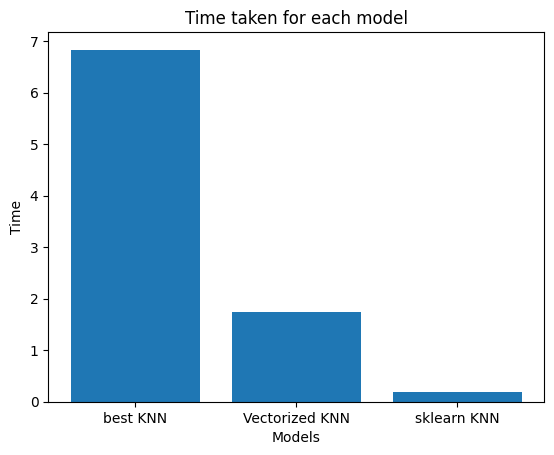

In [42]:
tarr=[]
start_time = time.time()
classifier = CustomClassifier(encoder=1, k=10, distmetric='euclidean')
result = classifier.fit_predict_evaluate()
end_time = time.time()

tarr.append(end_time-start_time)

start_time = time.time()
classifier = CustomClassifierV(encoder=1, k=10, distmetric='euclidean')
result = classifier.fit_predict_evaluate()
end_time = time.time()

tarr.append(end_time-start_time)

#used chatgpt to implement sklearn knn.: implement knn in sklearn in python

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error


X=[]
y=[]

for i in range(0,len(d)):
    X.append(d[i][1][0])
    y.append(d[i][3])

start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = KNeighborsClassifier(n_neighbors=10)  # You can adjust n_neighbors
classifier.fit(X_train, y_train)  # Use .fit() for both classifier and regressor
y_pred = classifier.predict(X_test)  # Use .predict() for both classifier and regressor
end_time = time.time()

tarr.append(end_time-start_time)


modelnames=['best KNN','Vectorized KNN','sklearn KNN']

plt.bar(modelnames, tarr)
plt.xlabel("Models")
plt.ylabel("Time")
plt.title("Time taken for each model")

# Show the plot
plt.show()





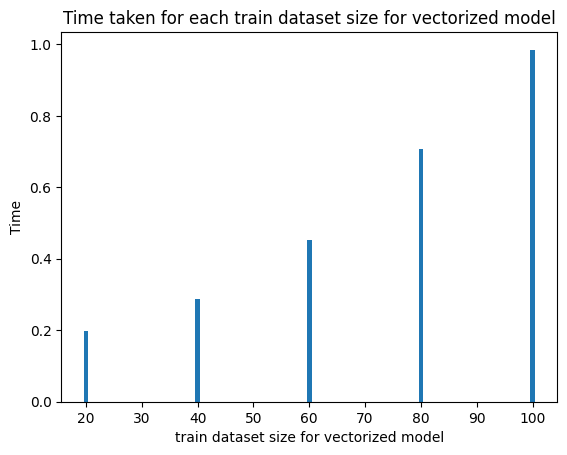

In [43]:
datapart=[20,40,60,80,100]
timepart=[]

for i in datapart:
    start_time = time.time()
    classifier = CustomClassifierV(encoder=2, k=10, distmetric='euclidean',multi=(i/100))
    result = classifier.fit_predict_evaluate()
    end_time = time.time()
    timepart.append(end_time-start_time)

plt.bar(datapart, timepart)
plt.xlabel("train dataset size for vectorized model")
plt.ylabel("Time")
plt.title("Time taken for each train dataset size for vectorized model")

# Show the plot
plt.show()

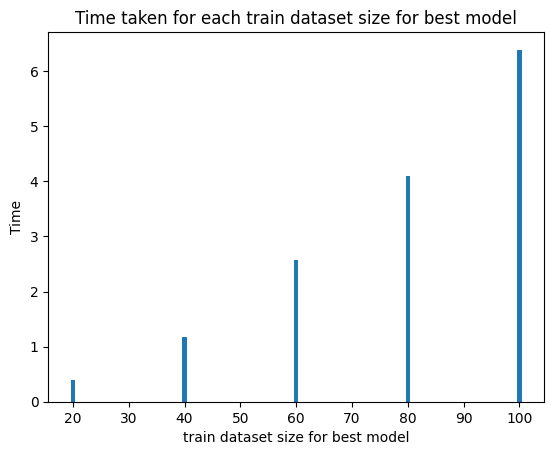

In [44]:
datapart=[20,40,60,80,100]
timepart=[]

for i in datapart:
    start_time = time.time()
    classifier = CustomClassifier(encoder=2, k=10, distmetric='euclidean',multi=(i/100))
    result = classifier.fit_predict_evaluate()
    end_time = time.time()
    timepart.append(end_time-start_time)

plt.bar(datapart, timepart)
plt.xlabel("train dataset size for best model")
plt.ylabel("Time")
plt.title("Time taken for each train dataset size for best model")

# Show the plot
plt.show()

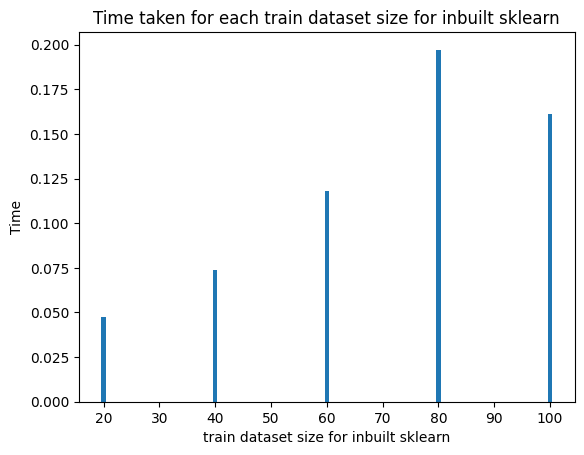

In [54]:
datapart=[20,40,60,80,100]
timepart=[]

X=[]
y=[]

for i in range(0,int(len(d)*0.2)):
    X.append(d[i][1][0])
    y.append(d[i][3])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
start_time = time.time()
classifier = KNeighborsClassifier(n_neighbors=10)  # You can adjust n_neighbors
classifier.fit(X_train, y_train)  # Use .fit() for both classifier and regressor
y_pred = classifier.predict(X_test)  # Use .predict() for both classifier and regressor
end_time = time.time()

timepart.append(end_time-start_time)

X=[]
y=[]

for i in range(0,int(len(d)*0.4)):
    X.append(d[i][1][0])
    y.append(d[i][3])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
start_time = time.time()
classifier = KNeighborsClassifier(n_neighbors=10)  # You can adjust n_neighbors
classifier.fit(X_train, y_train)  # Use .fit() for both classifier and regressor
y_pred = classifier.predict(X_test)  # Use .predict() for both classifier and regressor
end_time = time.time()

timepart.append(end_time-start_time)

X=[]
y=[]

for i in range(0,int(len(d)*0.6)):
    X.append(d[i][1][0])
    y.append(d[i][3])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
start_time = time.time()
classifier = KNeighborsClassifier(n_neighbors=10)  # You can adjust n_neighbors
classifier.fit(X_train, y_train)  # Use .fit() for both classifier and regressor
y_pred = classifier.predict(X_test)  # Use .predict() for both classifier and regressor
end_time = time.time()

timepart.append(end_time-start_time)

X=[]
y=[]

for i in range(0,int(len(d)*0.8)):
    X.append(d[i][1][0])
    y.append(d[i][3])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
start_time = time.time()
classifier = KNeighborsClassifier(n_neighbors=10)  # You can adjust n_neighbors
classifier.fit(X_train, y_train)  # Use .fit() for both classifier and regressor
y_pred = classifier.predict(X_test)  # Use .predict() for both classifier and regressor
end_time = time.time()

timepart.append(end_time-start_time)

X=[]
y=[]

for i in range(0,int(len(d))):
    X.append(d[i][1][0])
    y.append(d[i][3])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
start_time = time.time()
classifier = KNeighborsClassifier(n_neighbors=10)  # You can adjust n_neighbors
classifier.fit(X_train, y_train)  # Use .fit() for both classifier and regressor
y_pred = classifier.predict(X_test)  # Use .predict() for both classifier and regressor
end_time = time.time()

timepart.append(end_time-start_time)

plt.bar(datapart, timepart)
plt.xlabel("train dataset size for inbuilt sklearn")
plt.ylabel("Time")
plt.title("Time taken for each train dataset size for inbuilt sklearn")

# Show the plot
plt.show()

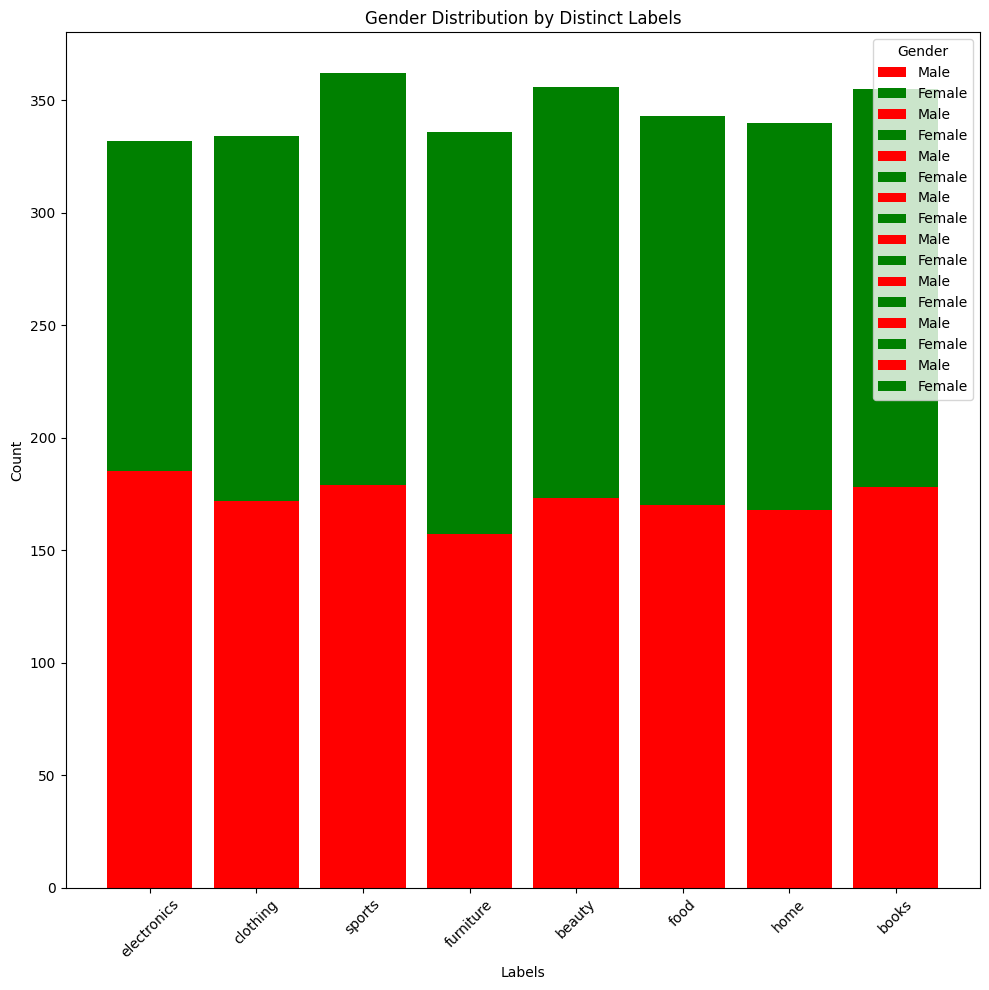

Red color for Male.
Green color for Male.


In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,multilabel_confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plot

dfs = pd.read_csv(r'advertisement.csv')
# print(df)
# df.head()

df=pd.DataFrame(dfs)

###################################################################
all_labels = df['labels'].str.split().explode().unique()


# Plot gender distribution for each label
plot.figure(figsize=(10, 10))

# Loop through each distinct label
for label in all_labels:
    label_data = df[df['labels'].str.contains(label)]
    gender_counts = label_data['gender'].value_counts()
    
    # Plotting bars for each gender count
    plot.bar(label, gender_counts['Male'], color='red', label='Male')
    plot.bar(label, gender_counts['Female'], color='green', bottom=gender_counts['Male'], label='Female')
    
plot.title('Gender Distribution by Distinct Labels')
plot.xlabel('Labels')
plot.ylabel('Count')
plot.legend(title='Gender')
plot.xticks(rotation=45)
plot.tight_layout()

plot.show()
print("Red color for Male.")
print("Green color for Male.")

##########################################################################

#used chatgpt to encode data: gave examples of data and asked it to encode the multi label data
# Initialize LabelEncoder for each column
label_encoders = {}
encoded_columns = []
for column in df.columns:
    if column != 'labels':
        le = LabelEncoder()
        encoded_column = column + '_encoded'
        df[encoded_column] = le.fit_transform(df[column])
        label_encoders[column] = le
        encoded_columns.append(encoded_column)

# Initialize MultiLabelBinarizer for the 'labels' column
mlb = MultiLabelBinarizer()
labels_binarized = mlb.fit_transform(df['labels'].str.split())
labels_encoded_df = pd.DataFrame(labels_binarized, columns=mlb.classes_)

# Concatenate the encoded labels DataFrame with the encoded columns
encoded_df = pd.concat([df[encoded_columns], labels_encoded_df], axis=1)


X = encoded_df[['age_encoded', 'gender_encoded', 'income_encoded','education_encoded','married_encoded','children_encoded','city_encoded','occupation_encoded','purchase_amount_encoded','most bought item_encoded']]
y = encoded_df[['beauty', 'books', 'clothing','electronics','food','furniture','home','sports']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(X_train)


In [47]:
from sklearn.tree import DecisionTreeClassifier
from skmultilearn.problem_transform import LabelPowerset

#used chatgpt for powerset implmentation: asked it to implement a fit() and predict() for the classifier class

class DecisionTreePowersetClassifier:
    def __init__(self, max_depth=None, max_features=None, criterion='gini'):
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.classifier = None

    def fit(self, X_train, y_train):
        # Transform the problem to multi-class using LabelPowerset
        self.label_powerset = LabelPowerset()
        y_train_transformed = self.label_powerset.transform(y_train)

        # Initialize the Decision Tree Classifier
        self.classifier = DecisionTreeClassifier(
            max_depth=self.max_depth,
            max_features=self.max_features,
            criterion=self.criterion
        )

        # Fit the classifier
        self.classifier.fit(X_train, y_train_transformed)

    def predict(self, X_test):
        if self.classifier is None:
            raise ValueError("Classifier not fitted. Call fit() first.")
        
        # Make predictions
        y_pred_transformed = self.classifier.predict(X_test)
        
        # Transform predictions back to original label space
        y_pred = self.label_powerset.inverse_transform(y_pred_transformed)
        
        return y_pred


maxdepth = [3,5,10,20,30]
maxfeatures = [3,5,7,9,11]
powerarr=[]

for i in maxdepth:
    for j in maxfeatures:
        classifier = DecisionTreePowersetClassifier(max_depth=i, max_features=j, criterion='entropy')
        classifier.fit(X_train, y_train)

        # Make predictions
        y_pred = classifier.predict(X_test)

        # Calculate Accuracy
        print('max_depth='+str(j)+' '+'max_features='+str(i)+' '+'criterion=entropy')
        accuracy = accuracy_score(y_test, y_pred)
        print("Accuracy:", accuracy)

        # Calculate F1 Score (micro and macro)
        f1_micro = f1_score(y_test, y_pred, average='micro', zero_division=1)
        f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=1)
        print("F1 Score (Micro):", f1_micro)
        print("F1 Score (Macro):", f1_macro)

        # # Calculate Confusion Matrix
        conf_matrix_multilabel = multilabel_confusion_matrix(y_test, y_pred)
        print("Multilabel Confusion Matrix:")
        print(conf_matrix_multilabel)

        # Calculate Precision (micro and macro)
        precision_micro = precision_score(y_test, y_pred, average='micro', zero_division=1)
        precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=1)
        print("Precision (Micro):", precision_micro)
        print("Precision (Macro):", precision_macro)

        # Calculate Recall (micro and macro)
        recall_micro = recall_score(y_test, y_pred, average='micro', zero_division=1)
        recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=1)
        print("Recall (Micro):", recall_micro)
        print("Recall (Macro):", recall_macro)

        powerarr.append((f1_micro,(i,j,'entropy')))


for i in maxdepth:
    for j in maxfeatures:
        classifier = DecisionTreePowersetClassifier(max_depth=i, max_features=j, criterion='gini')
        classifier.fit(X_train, y_train)

        # Make predictions
        y_pred = classifier.predict(X_test)

        # Calculate Accuracy
        print('max_depth='+str(j)+' '+'max_features='+str(i)+' '+'criterion=gini')
        accuracy = accuracy_score(y_test, y_pred)
        print("Accuracy:", accuracy)

        # Calculate F1 Score (micro and macro)
        f1_micro = f1_score(y_test, y_pred, average='micro', zero_division=1)
        f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=1)
        print("F1 Score (Micro):", f1_micro)
        print("F1 Score (Macro):", f1_macro)

        # # Calculate Confusion Matrix
        conf_matrix_multilabel = multilabel_confusion_matrix(y_test, y_pred)
        print("Multilabel Confusion Matrix:")
        print(conf_matrix_multilabel)

        # Calculate Precision (micro and macro)
        precision_micro = precision_score(y_test, y_pred, average='micro', zero_division=1)
        precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=1)
        print("Precision (Micro):", precision_micro)
        print("Precision (Macro):", precision_macro)

        # Calculate Recall (micro and macro)
        recall_micro = recall_score(y_test, y_pred, average='micro', zero_division=1)
        recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=1)
        print("Recall (Micro):", recall_micro)
        print("Recall (Macro):", recall_macro)

        powerarr.append((f1_micro,(i,j,'gini')))

# print("Predicted labels for test data:")
# print(y_pred)

max_depth=3 max_features=3 criterion=entropy
Accuracy: 0.015
F1 Score (Micro): 0.24345847554038683
F1 Score (Macro): 0.19295745497050415
Multilabel Confusion Matrix:
[[[ 46  86]
  [ 32  36]]

 [[134   0]
  [ 66   0]]

 [[137   0]
  [ 63   0]]

 [[122  15]
  [ 55   8]]

 [[108  33]
  [ 54   5]]

 [[ 70  64]
  [ 39  27]]

 [[118  11]
  [ 63   8]]

 [[ 93  36]
  [ 48  23]]]
Precision (Micro): 0.3039772727272727
Precision (Macro): 0.48525917978685973
Recall (Micro): 0.2030360531309298
Recall (Macro): 0.19835653522533025
max_depth=5 max_features=3 criterion=entropy
Accuracy: 0.1
F1 Score (Micro): 0.4015444015444015
F1 Score (Macro): 0.38338249838789284
Multilabel Confusion Matrix:
[[[112  20]
  [ 47  21]]

 [[116  18]
  [ 44  22]]

 [[112  25]
  [ 30  33]]

 [[135   2]
  [ 48  15]]

 [[127  14]
  [ 39  20]]

 [[119  15]
  [ 47  19]]

 [[129   0]
  [ 71   0]]

 [[129   0]
  [ 45  26]]]
Precision (Micro): 0.624
Precision (Macro): 0.7075715504873101
Recall (Micro): 0.29601518026565465
Recall (

In [48]:
sortedpowerarr=sorted(powerarr,reverse=True)

for i in range(0,3):
    print(str(sortedpowerarr[i][0])+' '+'max_depth='+str(sortedpowerarr[i][1][0])+' '+'max_features='+str(sortedpowerarr[i][1][1])+' '+'criterion='+sortedpowerarr[i][1][2])

0.5297549591598599 max_depth=5 max_features=11 criterion=entropy
0.5218198700092851 max_depth=30 max_features=9 criterion=entropy
0.5187901008249313 max_depth=20 max_features=9 criterion=entropy


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier


#used chatgpt for multioutput implmentation: asked it to implement a fit() and predict() for the classifier class

class DecisionTreeMultiOutputClassifier:
    def __init__(self, max_depth=None, max_features=None, criterion='gini'):
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.classifier = None

    def fit(self, X_train, y_train):
        # Initialize the Decision Tree Classifier
        base_classifier = DecisionTreeClassifier(
            max_depth=self.max_depth,
            max_features=self.max_features,
            criterion=self.criterion
        )
        
        # Initialize the MultiOutputClassifier
        self.classifier = MultiOutputClassifier(base_classifier, n_jobs=-1)
        
        # Fit the classifier
        self.classifier.fit(X_train, y_train)

    def predict(self, X_test):
        if self.classifier is None:
            raise ValueError("Classifier not fitted. Call fit() first.")
        
        # Make predictions
        y_pred = self.classifier.predict(X_test)
        
        return y_pred

maxdepth = [3,5,10,20,30]
maxfeatures = [3,5,7,9,11]
multiarr=[]

for i in maxdepth:
    for j in maxfeatures:
        classifier = DecisionTreeMultiOutputClassifier(max_depth=i, max_features=j, criterion='entropy')
        classifier.fit(X_train, y_train)

        # Make predictions
        y_pred = classifier.predict(X_test)

        # Calculate Accuracy
        print('max_depth='+str(j)+' '+'max_features='+str(i)+' '+'criterion=entropy')
        accuracy = accuracy_score(y_test, y_pred)
        print("Accuracy:", accuracy)

        # Calculate F1 Score (micro and macro)
        f1_micro = f1_score(y_test, y_pred, average='micro', zero_division=1)
        f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=1)
        print("F1 Score (Micro):", f1_micro)
        print("F1 Score (Macro):", f1_macro)

        # # Calculate Confusion Matrix
        conf_matrix_multilabel = multilabel_confusion_matrix(y_test, y_pred)
        print("Multilabel Confusion Matrix:")
        print(conf_matrix_multilabel)

        # Calculate Precision (micro and macro)
        precision_micro = precision_score(y_test, y_pred, average='micro', zero_division=1)
        precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=1)
        print("Precision (Micro):", precision_micro)
        print("Precision (Macro):", precision_macro)

        # Calculate Recall (micro and macro)
        recall_micro = recall_score(y_test, y_pred, average='micro', zero_division=1)
        recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=1)
        print("Recall (Micro):", recall_micro)
        print("Recall (Macro):", recall_macro)

        multiarr.append((f1_micro,(i,j,'entropy')))


for i in maxdepth:
    for j in maxfeatures:
        classifier = DecisionTreeMultiOutputClassifier(max_depth=i, max_features=j, criterion='gini')
        classifier.fit(X_train, y_train)

        # Make predictions
        y_pred = classifier.predict(X_test)

        # Calculate Accuracy
        print('max_depth='+str(j)+' '+'max_features='+str(i)+' '+'criterion=gini')
        accuracy = accuracy_score(y_test, y_pred)
        print("Accuracy:", accuracy)

        # Calculate F1 Score (micro and macro)
        f1_micro = f1_score(y_test, y_pred, average='micro', zero_division=1)
        f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=1)
        print("F1 Score (Micro):", f1_micro)
        print("F1 Score (Macro):", f1_macro)

        # # Calculate Confusion Matrix
        conf_matrix_multilabel = multilabel_confusion_matrix(y_test, y_pred)
        print("Multilabel Confusion Matrix:")
        print(conf_matrix_multilabel)

        # Calculate Precision (micro and macro)
        precision_micro = precision_score(y_test, y_pred, average='micro', zero_division=1)
        precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=1)
        print("Precision (Micro):", precision_micro)
        print("Precision (Macro):", precision_macro)

        # Calculate Recall (micro and macro)
        recall_micro = recall_score(y_test, y_pred, average='micro', zero_division=1)
        recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=1)
        print("Recall (Micro):", recall_micro)
        print("Recall (Macro):", recall_macro)

        multiarr.append((f1_micro,(i,j,'gini')))


max_depth=3 max_features=3 criterion=entropy
Accuracy: 0.03
F1 Score (Micro): 0.19471947194719472
F1 Score (Macro): 0.1676445790963316
Multilabel Confusion Matrix:
[[[132   0]
  [ 68   0]]

 [[134   0]
  [ 50  16]]

 [[135   2]
  [ 55   8]]

 [[137   0]
  [ 63   0]]

 [[140   1]
  [ 59   0]]

 [[117  17]
  [ 57   9]]

 [[129   0]
  [ 71   0]]

 [[129   0]
  [ 45  26]]]
Precision (Micro): 0.7468354430379747
Precision (Macro): 0.7682692307692307
Recall (Micro): 0.11195445920303605
Recall (Macro): 0.10899614860882467
max_depth=5 max_features=3 criterion=entropy
Accuracy: 0.09
F1 Score (Micro): 0.3343195266272189
F1 Score (Macro): 0.3036081687919923
Multilabel Confusion Matrix:
[[[131   1]
  [ 62   6]]

 [[127   7]
  [ 59   7]]

 [[129   8]
  [ 34  29]]

 [[122  15]
  [ 42  21]]

 [[141   0]
  [ 59   0]]

 [[134   0]
  [ 47  19]]

 [[126   3]
  [ 67   4]]

 [[127   2]
  [ 44  27]]]
Precision (Micro): 0.7583892617449665
Precision (Macro): 0.7783403785558958
Recall (Micro): 0.214421252371916

In [50]:
sortedmultiarr=sorted(multiarr,reverse=True)

for i in range(0,3):
    print(str(sortedmultiarr[i][0])+' '+'max_depth='+str(sortedmultiarr[i][1][0])+' '+'max_features='+str(sortedmultiarr[i][1][1])+' '+'criterion='+sortedmultiarr[i][1][2])

0.5290068829891839 max_depth=10 max_features=11 criterion=gini
0.5287769784172662 max_depth=20 max_features=9 criterion=entropy
0.5229166666666667 max_depth=10 max_features=11 criterion=entropy


In [51]:
from sklearn.model_selection import KFold

#used chatgpt for k-fold validation: gave input as the classes for the dt classifier and asked it to implement a k fold validator from sklearn


# Perform K-Fold cross-validation
k_folds = 7
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

for train_indices, test_indices in kf.split(X): 
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]   
    # Initialize and fit the classifier (Powerset Formulation)
    powerset_classifier = DecisionTreePowersetClassifier(max_depth=sortedpowerarr[0][1][0], max_features=sortedpowerarr[0][1][1], criterion=sortedpowerarr[0][1][2])
    powerset_classifier.fit(X_train, y_train)
    
    # Make predictions
    powerset_y_pred = powerset_classifier.predict(X_test)
        
    # Calculate Accuracy
    accuracy = accuracy_score(y_test, powerset_y_pred)
    print("Accuracy:", accuracy)

    # Calculate F1 Score (micro and macro)
    f1_micro = f1_score(y_test, powerset_y_pred, average='micro', zero_division=1)
    f1_macro = f1_score(y_test, powerset_y_pred, average='macro', zero_division=1)
    print("F1 Score (Micro):", f1_micro)
    print("F1 Score (Macro):", f1_macro)

    

    # Calculate Precision (micro and macro)
    precision_micro = precision_score(y_test, powerset_y_pred, average='micro', zero_division=1)
    precision_macro = precision_score(y_test, powerset_y_pred, average='macro', zero_division=1)
    print("Precision (Micro):", precision_micro)
    print("Precision (Macro):", precision_macro)

    # Calculate Recall (micro and macro)
    recall_micro = recall_score(y_test, powerset_y_pred, average='micro', zero_division=1)
    recall_macro = recall_score(y_test, powerset_y_pred, average='macro', zero_division=1)
    print("Recall (Micro):", recall_micro)
    print("Recall (Macro):", recall_macro)

    # # Calculate Confusion Matrix
    conf_matrix_multilabel = multilabel_confusion_matrix(y_test, powerset_y_pred)
    print("Multilabel Confusion Matrix:")
    print(conf_matrix_multilabel)

Accuracy: 0.11188811188811189
F1 Score (Micro): 0.5311475409836065
F1 Score (Macro): 0.520366483887777
Precision (Micro): 0.7012987012987013
Precision (Macro): 0.7220938270441724
Recall (Micro): 0.42744063324538256
Recall (Macro): 0.42258304897631477
Multilabel Confusion Matrix:
[[[ 74  19]
  [ 22  28]]

 [[ 84   6]
  [ 30  23]]

 [[ 93   5]
  [ 27  18]]

 [[ 78  18]
  [ 24  23]]

 [[100   3]
  [ 31   9]]

 [[ 89   7]
  [ 32  15]]

 [[ 88   5]
  [ 30  20]]

 [[ 90   6]
  [ 21  26]]]
Accuracy: 0.08391608391608392
F1 Score (Micro): 0.5122349102773246
F1 Score (Macro): 0.5093268058910011
Precision (Micro): 0.6408163265306123
Precision (Macro): 0.6691853319051277
Recall (Micro): 0.4266304347826087
Recall (Macro): 0.4222255092957823
Multilabel Confusion Matrix:
[[[79 22]
  [25 17]]

 [[95  6]
  [26 16]]

 [[98  0]
  [22 23]]

 [[91  6]
  [25 21]]

 [[77 23]
  [23 20]]

 [[75 16]
  [27 25]]

 [[88 13]
  [33  9]]

 [[85  2]
  [30 26]]]
Accuracy: 0.04195804195804196
F1 Score (Micro): 0.4825291

In [52]:
# Perform K-Fold cross-validation
k_folds = 7
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)


#used chatgpt for k-fold validation: gave input as the classes for the dt classifier and asked it to implement a k fold validator from sklearn

for train_indices, test_indices in kf.split(X):
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    multioutput_classifier = DecisionTreeMultiOutputClassifier(max_depth=sortedmultiarr[0][1][0], max_features=sortedmultiarr[0][1][1], criterion=sortedmultiarr[0][1][2])
    multioutput_classifier.fit(X_train, y_train)

    # Make predictions
    multioutput_y_pred = multioutput_classifier.predict(X_test)

    # Calculate Accuracy
    accuracy = accuracy_score(y_test, multioutput_y_pred)
    print("Accuracy:", accuracy)

    # Calculate F1 Score (micro and macro)
    f1_micro = f1_score(y_test, multioutput_y_pred, average='micro', zero_division=1)
    f1_macro = f1_score(y_test, multioutput_y_pred, average='macro', zero_division=1)
    print("F1 Score (Micro):", f1_micro)
    print("F1 Score (Macro):", f1_macro)

    

    # Calculate Precision (micro and macro)
    precision_micro = precision_score(y_test, multioutput_y_pred, average='micro', zero_division=1)
    precision_macro = precision_score(y_test, multioutput_y_pred, average='macro', zero_division=1)
    print("Precision (Micro):", precision_micro)
    print("Precision (Macro):", precision_macro)

    # Calculate Recall (micro and macro)
    recall_micro = recall_score(y_test, multioutput_y_pred, average='micro', zero_division=1)
    recall_macro = recall_score(y_test, multioutput_y_pred, average='macro', zero_division=1)
    print("Recall (Micro):", recall_micro)
    print("Recall (Macro):", recall_macro)

    # # Calculate Confusion Matrix
    conf_matrix_multilabel = multilabel_confusion_matrix(y_test, multioutput_y_pred)
    print("Multilabel Confusion Matrix:")
    print(conf_matrix_multilabel)

Accuracy: 0.04895104895104895
F1 Score (Micro): 0.5187239944521498
F1 Score (Macro): 0.5180700941433853
Precision (Micro): 0.5467836257309941
Precision (Macro): 0.5525788832474879
Recall (Micro): 0.49340369393139843
Recall (Macro): 0.49079146036843746
Multilabel Confusion Matrix:
[[[82 11]
  [24 26]]

 [[65 25]
  [28 25]]

 [[77 21]
  [23 22]]

 [[79 17]
  [20 27]]

 [[80 23]
  [26 14]]

 [[73 23]
  [24 23]]

 [[68 25]
  [25 25]]

 [[86 10]
  [22 25]]]
Accuracy: 0.055944055944055944
F1 Score (Micro): 0.5139664804469274
F1 Score (Macro): 0.5088267988292883
Precision (Micro): 0.5287356321839081
Precision (Macro): 0.5281242088239597
Recall (Micro): 0.5
Recall (Macro): 0.4972048686343428
Multilabel Confusion Matrix:
[[[79 22]
  [27 15]]

 [[83 18]
  [17 25]]

 [[80 18]
  [20 25]]

 [[68 29]
  [20 26]]

 [[74 26]
  [21 22]]

 [[72 19]
  [26 26]]

 [[88 13]
  [27 15]]

 [[68 19]
  [26 30]]]
Accuracy: 0.08391608391608392
F1 Score (Micro): 0.5078014184397163
F1 Score (Macro): 0.500300353854322